# 1. Environment Setup


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%pip install pandas numpy tqdm matplotlib seaborn scikit-learn scikeras tensorflow keras keras-tuner scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.6 MB/s eta 0:00:00


In [ ]:
# Data Manipulation
import pandas as pd
import re
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Deep Learning
import tensorflow as tf
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import keras_tuner as kt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, LeakyReLU
from keras.regularizers import l2
from sklearn.model_selection import train_test_split

## 1.1 Data Imports

In [ ]:
# Import Data
df = pd.read_csv('/content/drive/MyDrive/maastricht.csv')

# Separate features (X) and target variable (y)
X = df.drop('precipitation', axis=1)
y = df['precipitation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Base Model (ANN)
Below is a simple deep learning model. This will give us a great place to start from and will serve as our baseline for future performances.

## 2.1 Structure
- *Input Layer:* Receives the input features (e.g., your dataset features excluding the target variable). Each neuron in this layer corresponds to one feature.
- *Hidden Layers:* The network includes two hidden layers with 64 and 32 neurons, respectively.
- *Output Layer:*
    - Contains a single neuron, as this is a regression task where we predict a single continuous value (precipitation).
    - No activation function is used in this layer, as we want to output raw values.

In [ ]:
# Build the ANN model
model = Sequential() # Tensorflow Deep Learning API
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.2
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.7720 - mae: 0.5940 - val_loss: 0.2005 - val_mae: 0.3037
Epoch 2/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1863 - mae: 0.2856 - val_loss: 0.1801 - val_mae: 0.2274
Epoch 3/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1733 - mae: 0.2623 - val_loss: 0.2042 - val_mae: 0.3180
Epoch 4/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1731 - mae: 0.2708 - val_loss: 0.1754 - val_mae: 0.2303
Epoch 5/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1493 - mae: 0.2422 - val_loss: 0.1820 - val_mae: 0.2453
Epoch 6/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1512 - mae: 0.2500 - val_loss: 0.1999 - val_mae: 0.3073
Epoch 7/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1414 - mae: 0.2508 - val_loss: 0.1706 - val_mae: 0.2430
Epoch 8/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1642 - mae: 0.2580 - val_loss: 0.3351 - val_mae: 0.4004
Epoch 9/10
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1743 - mae:

## 2.2 Performance

Plotting the performance (training and validation loss) over epochs helps visualize the learning process of the model. It shows whether the model is learning effectively or if adjustments are needed. By observing these plots, you can identify whether the model is converging, overfitting, or underfitting.

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


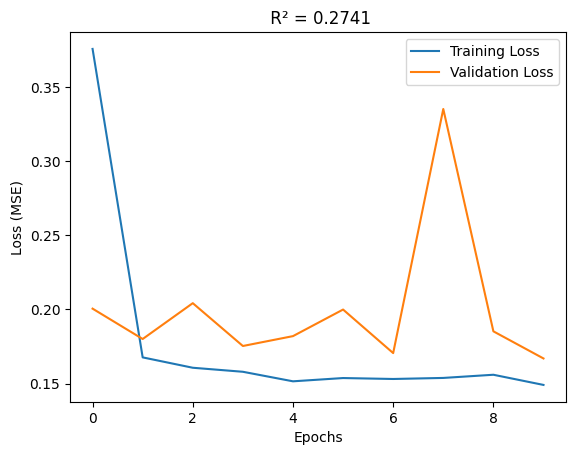

In [ ]:
def plot_model_results(history, model, X_test, y_test, title=""):
    """
    Plots training and validation loss over epochs and calculates R² score.

    Parameters:
    - history: History object from model training.
    - model: Trained model for making predictions.
    - X_test: Test features for prediction.
    - y_test: True values for R² calculation.
    - title: Custom title for each subplot
    """

    # Get training and validation loss from the history object
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    # Make predictions on the test set and flatten predictions
    y_pred = model.predict(X_test).flatten()

    # Calculate the R² score
    r2 = r2_score(y_test, y_pred)

    # Plot training and validation loss over epochs
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title(f"{title} R² = {r2:.4f}")
    plt.xlabel('Epochs')
    plt.ylabel('Loss (MSE)')
    plt.legend()

plot_model_results(history, model, X_test, y_test)

# 3. Epochs
Seeing as our model's traning and validation losses were trending downward, lets increase the number of epochs our model trains.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_24 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_25 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3379 - mae: 0.3943 - val_loss: 0.1899 - val_mae: 0.2853
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1547 - mae: 0.2584 - val_loss: 0.1747 - val_mae: 0.2648
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1455 - mae: 0.2444 - val_loss: 0.1644 - val_mae: 0.2257
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1573 - mae: 0.2459 - val_loss: 0.1754 - val_mae: 0.2638
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1400 - mae: 0.2368 - val_loss: 0.2019 - val_mae: 0.3157
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1459 - mae: 0.2512 - val_loss: 0.1630 - val_mae: 0.2238
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1520 - mae: 0.2389 - val_loss: 0.1599 - val_mae: 0.2219
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1351 - mae: 0.2282 - val_loss: 0.1706 - val_mae: 0.2563
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1563 - mae: 

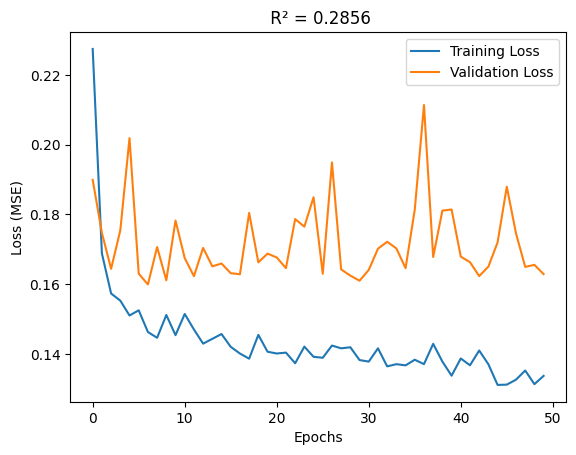

In [ ]:
# Build the ANN model
model = Sequential() # Tensorflow Deep Learning API
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(
    x=X_train,
    y=y_train,
    epochs=50, #increased from 10 to 50 epochs
    batch_size=32,
    validation_split=0.2
)

plot_model_results(history, model, X_test, y_test)

# 4. Scaling Data


1. **Standardization Scaler (Z-Score Normalization)**

- *What It Does*: Centers the data around the mean and scales it according to the standard deviation, resulting in a distribution with a mean of 0 and a standard deviation of 1.
- *How It Works*: Each value is transformed using: $(x - \text{mean}) / \text{std deviation}$.
- *When to Use*: Preferred when the data does not have a fixed range or when it follows a normal distribution.
- *Why*: Standardization ensures that features are centered and scaled, improving the performance of algorithms like linear regression and clustering, which assume normally distributed data.

In [ ]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.2415 - mae: 0.3251 - val_loss: 0.1486 - val_mae: 0.2294
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1212 - mae: 0.2162 - val_loss: 0.1321 - val_mae: 0.2056
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0973 - mae: 0.1939 - val_loss: 0.1305 - val_mae: 0.1976
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1117 - mae: 0.1940 - val_loss: 0.1262 - val_mae: 0.1952
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0916 - mae: 0.1791 - val_loss: 0.1254 - val_mae: 0.1919
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1102 - mae: 0.2048 - val_loss: 0.1237 - val_mae: 0.1888
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0885 - mae: 0.1783 - val_loss: 0.1241 - val_mae: 0.1877
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0946 - mae: 0.1754 - val_loss: 0.1257 - val_mae: 0.1932
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1073 - mae: 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


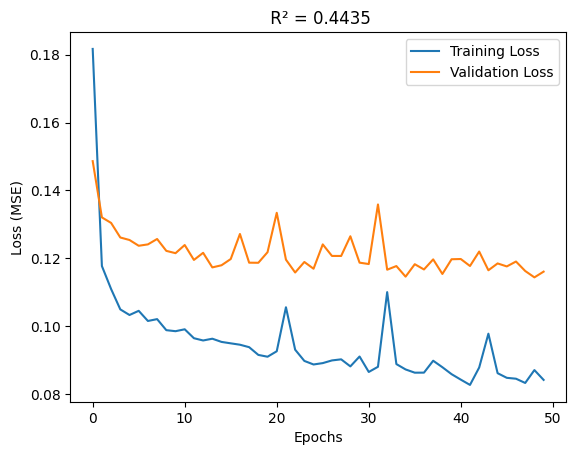

In [ ]:
plot_model_results(history, model, X_test_scaled, y_test)

2. **MinMax Scaler**

- *What It Does*: Scales the features to a fixed range, typically between 0 and 1.
- *How It Works*: Transforms each feature by subtracting the minimum value and dividing by the range (max - min).
- *When to Use*: Useful when the data has a known minimum and maximum, or when you want to maintain zero-centered data but within a specific range.
- *Why*: It preserves the relationships between values while ensuring all features are on the same scale, which can be important for models sensitive to feature magnitudes (e.g., neural networks).

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both train and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Build the ANN model
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer and first hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2390 - mae: 0.2903 - val_loss: 0.1579 - val_mae: 0.2206
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1244 - mae: 0.2221 - val_loss: 0.1536 - val_mae: 0.2210
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1403 - mae: 0.2254 - val_loss: 0.1503 - val_mae: 0.2032
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1270 - mae: 0.2122 - val_loss: 0.1523 - val_mae: 0.2033
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1249 - mae: 0.2133 - val_loss: 0.1498 - val_mae: 0.2223
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1337 - mae: 0.2111 - val_loss: 0.1520 - val_mae: 0.2176
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1125 - mae: 0.2056 - val_loss: 0.1514 - val_mae: 0.2279
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1453 - mae: 0.2338 - val_loss: 0.1416 - val_mae: 0.1924
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1216 - mae: 

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


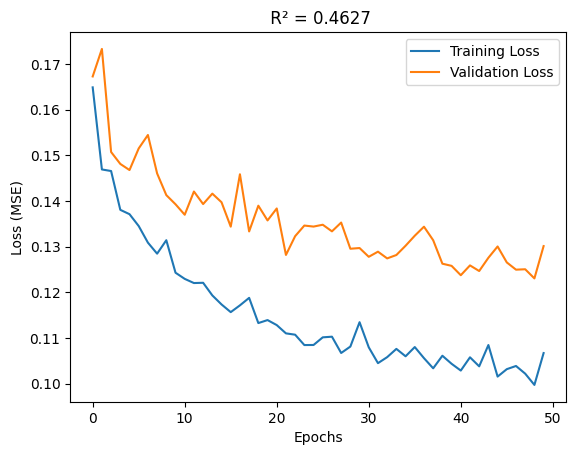

In [ ]:
plot_model_results(history, model, X_test_scaled, y_test)

# 5. Address Overfitting
Right now our model is overfitting - which can be identified by the large gap between Training and Validation losses.

## 5.1 Batch Normalization
Batch Normalization is a technique that normalizes the inputs to each layer within a neural network, adjusting them to a standard mean and variance. This process helps stabilize and speed up training, making the network less sensitive to initialization and learning rate. By reducing internal covariate shift, Batch Normalization can also improve generalization.

**Benefits**:
- Speeds up training by allowing higher learning rates.
- Reduces dependency on careful initialization.
- May help prevent overfitting in some cases.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,201 (12.50 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 192 (768.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.8123 - mae: 0.6395 - val_loss: 0.1866 - val_mae: 0.2388
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2203 - mae: 0.3452 - val_loss: 0.1787 - val_mae: 0.2338
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1795 - mae: 0.3020 - val_loss: 0.1719 - val_mae: 0.2415
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1667 - mae: 0.2827 - val_loss: 0.1732 - val_mae: 0.2499
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.1378 - mae: 0.2559 - val_loss: 0.1574 - val_mae: 0.2412
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1495 - mae: 0.2586 - val_loss: 0.1518 - val_mae: 0.2332
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1431 - mae: 0.2552 - val_loss: 0.1544 - val_mae: 0.2533
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1397 - mae: 0.2480 - val_loss: 0.1429 - val_mae: 0.2294
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1311 - mae:

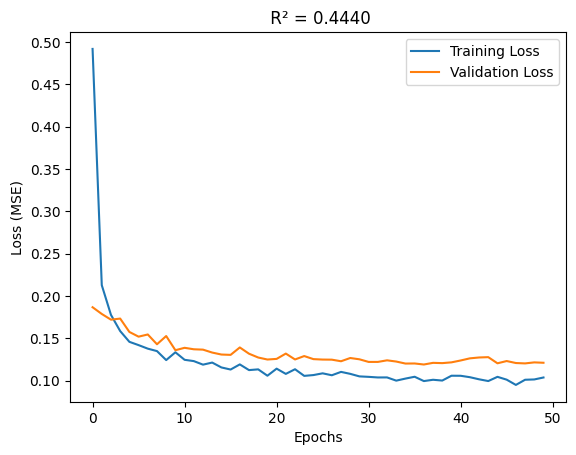

In [ ]:
# Build the ANN model with Batch Normalization
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())  # Batch Normalization after the first hidden layer

model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())  # Batch Normalization after the second hidden layer

model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
plot_model_results(history, model, X_test_scaled, y_test)

## 5.2 Regularization
Regularization is a set of techniques used to prevent overfitting by adding constraints or penalties to the model's learning process. In neural networks, regularization is often applied by adding a penalty to large weights, encouraging simpler models that generalize better.

**Benefits**:
- Helps prevent overfitting.
- Encourages simpler models, often with fewer features or smaller weights.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_29 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.7008 - mae: 0.2439 - val_loss: 0.5321 - val_mae: 0.1898
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.4851 - mae: 0.2099 - val_loss: 0.3946 - val_mae: 0.2058
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3460 - mae: 0.1956 - val_loss: 0.3185 - val_mae: 0.2073
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2834 - mae: 0.1964 - val_loss: 0.2564 - val_mae: 0.1780
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2102 - mae: 0.1691 - val_loss: 0.2275 - val_mae: 0.1873
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2035 - mae: 0.1825 - val_loss: 0.2034 - val_mae: 0.1878
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1995 - mae: 0.1996 - val_loss: 0.1839 - val_mae: 0.1724
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1651 - mae: 0.1734 - val_loss: 0.1810 - val_mae: 0.1926
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1466 - mae: 

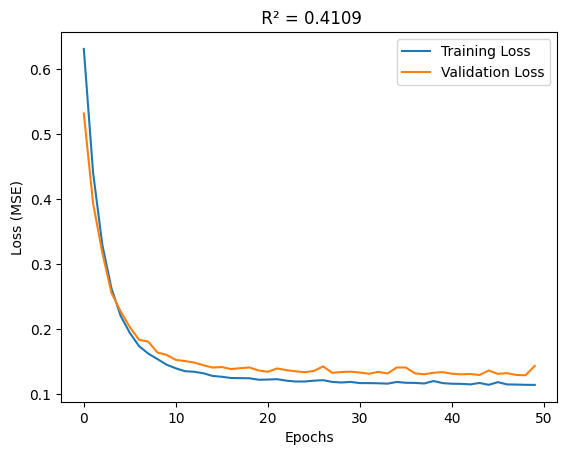

In [ ]:
# Build the ANN model with L2 regularization
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
plot_model_results(history, model, X_test_scaled, y_test)

## 5.3 Dropout
Dropout is a regularization technique where, during each training iteration, random neurons are "dropped" or temporarily deactivated, meaning they do not participate in that training step. This helps prevent the network from becoming too dependent on particular neurons, encouraging it to learn more robust, generalized patterns.

**Benefits**:
- Reduces overfitting by encouraging redundancy and co-adaptation in neurons.
- Improves generalization by making the model more robust to new data.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.3548 - mae: 0.4208 - val_loss: 0.1451 - val_mae: 0.1902
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1876 - mae: 0.2765 - val_loss: 0.1376 - val_mae: 0.1882
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1694 - mae: 0.2593 - val_loss: 0.1344 - val_mae: 0.1696
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1232 - mae: 0.2179 - val_loss: 0.1284 - val_mae: 0.1735
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1371 - mae: 0.2209 - val_loss: 0.1269 - val_mae: 0.1809
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1406 - mae: 0.2253 - val_loss: 0.1245 - val_mae: 0.1655
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1290 - mae: 0.1958 - val_loss: 0.1240 - val_mae: 0.1614
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1273 - mae: 0.2078 - val_loss: 0.1250 - val_mae: 0.1584
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.1344 - mae: 

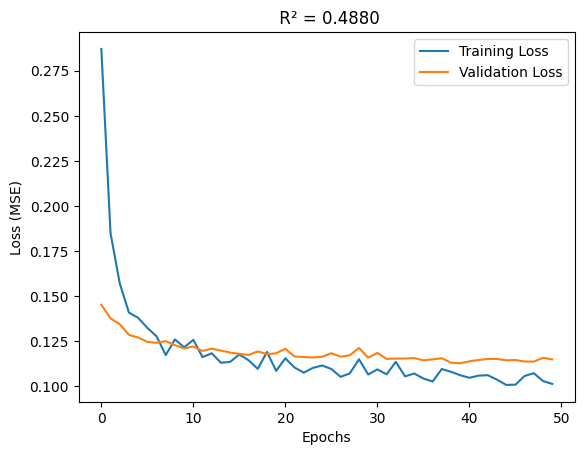

In [ ]:
# Build the ANN model with Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% rate after the first hidden layer

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% rate after the second hidden layer

model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
plot_model_results(history, model, X_test_scaled, y_test)

# 6. Further Improvements
Our Dropout model seems to return pretty good performance. Let's see if adjusting some model attributes can lead to even better results.

## 6.1 Learning Rate
The training loss look a little jagged; let's see if adjusting our learning rate will smooth it out/improve performance

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.5807 - mae: 0.5746 - val_loss: 0.3152 - val_mae: 0.3943
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4167 - mae: 0.4765 - val_loss: 0.2377 - val_mae: 0.3220
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3405 - mae: 0.4317 - val_loss: 0.2012 - val_mae: 0.2771
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3192 - mae: 0.4001 - val_loss: 0.1863 - val_mae: 0.2539
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2837 - mae: 0.3711 - val_loss: 0.1774 - val_mae: 0.2383
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2268 - mae: 0.3360 - val_loss: 0.1730 - val_mae: 0.2285
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2497 - mae: 0.3457 - val_loss: 0.1693 - val_mae: 0.2228
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2432 - mae: 0.3319 - val_loss: 0.1663 - val_mae: 0.2183
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2073 - mae: 0.3062 - va

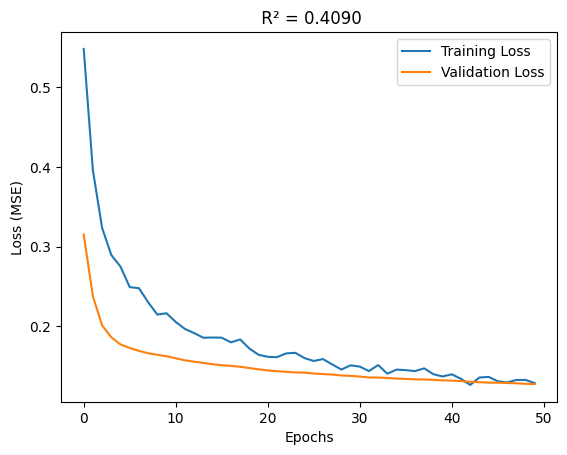

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1))

# Compile the model with a slightly reduced learning rate
model.compile(optimizer=Adam(learning_rate=0.0001), loss='mse', metrics=['mae'])
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, callbacks=[early_stop])

# Plot model results
plot_model_results(history, model, X_test_scaled, y_test)


## 6.2 Model Depth
Let's see if we can add more layers to increase model complexity/performance

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,713 (14.50 KB)

 Trainable params: 3,585 (14.00 KB)

 Non-trainable params: 128 (512.00 B)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 0.2997 - mae: 0.3268 - val_loss: 0.1785 - val_mae: 0.1926
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1617 - mae: 0.2287 - val_loss: 0.1579 - val_mae: 0.1773
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1542 - mae: 0.2159 - val_loss: 0.1503 - val_mae: 0.1822
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1578 - mae: 0.2192 - val_loss: 0.1461 - val_mae: 0.1785
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1616 - mae: 0.2180 - val_loss: 0.1435 - val_mae: 0.1754
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1524 - mae: 0.2054 - val_loss: 0.1429 - val_mae: 0.1725
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1477 - mae: 0.2002 - val_loss: 0.1359 - val_mae: 0.1776
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1438 - mae: 0.2027 - val_loss: 0.1353 - val_mae: 0.1779
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - lo

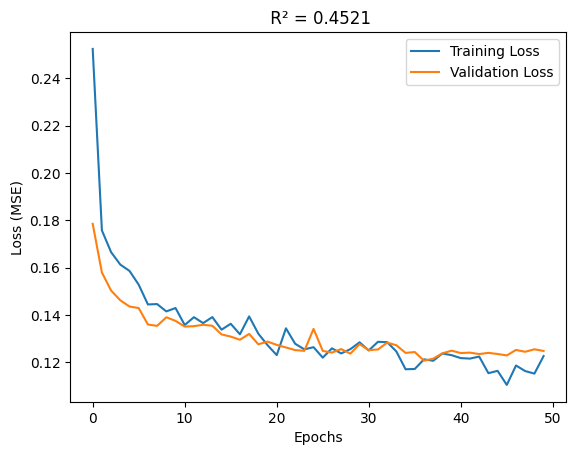

In [ ]:

# Build the ANN model with Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(8, activation='relu'))
model.add(Dropout(0.1))

model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=16, validation_split=0.2)
plot_model_results(history, model, X_test_scaled, y_test)

## 6.3 Activation Function
Let's see how a Leaky ReLu function will perform

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_22 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_23 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3102 - mae: 0.4112 - val_loss: 0.1625 - val_mae: 0.2003
Epoch 2/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1756 - mae: 0.2774 - val_loss: 0.1471 - val_mae: 0.1802
Epoch 3/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1481 - mae: 0.2443 - val_loss: 0.1384 - val_mae: 0.1756
Epoch 4/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1276 - mae: 0.2191 - val_loss: 0.1340 - val_mae: 0.1686
Epoch 5/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1162 - mae: 0.2101 - val_loss: 0.1365 - val_mae: 0.1608
Epoch 6/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1220 - mae: 0.2010 - val_loss: 0.1295 - val_mae: 0.1615
Epoch 7/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1359 - mae: 0.2064 - val_loss: 0.1312 - val_mae: 0.1568
Epoch 8/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1356 - mae: 0.2020 - val_loss: 0.1253 - val_mae: 0.1596
Epoch 9/50
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1128 - mae: 

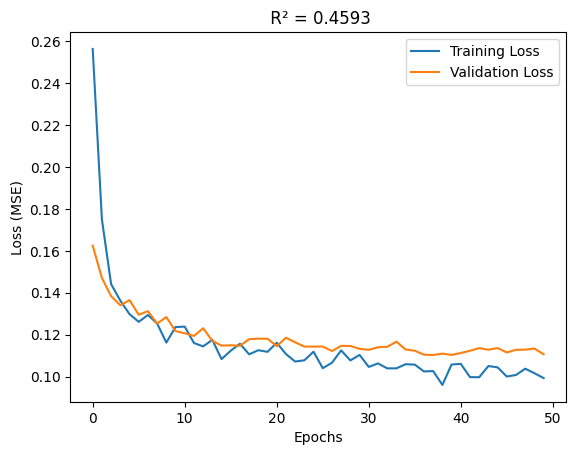

In [ ]:
# Build the ANN model with Leaky ReLU and Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1]))
model.add(LeakyReLU(alpha=0.01))  # Leaky ReLU with a small slope for negative values
model.add(Dropout(0.3))

model.add(Dense(32))
model.add(LeakyReLU(alpha=0.01))  # Leaky ReLU for the second hidden layer
model.add(Dropout(0.3))

model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(), loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
plot_model_results(history, model, X_test_scaled, y_test)


## 6.4 Batch Sizes
Let's test the impact of different batch sizes

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_27 (Dense)                     │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_21 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,817 (11.00 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2937 - mae: 0.3794 - val_loss: 0.1415 - val_mae: 0.1847
Epoch 2/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1644 - mae: 0.2583 - val_loss: 0.1308 - val_mae: 0.1742
Epoch 3/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1350 - mae: 0.2165 - val_loss: 0.1250 - val_mae: 0.1653
Epoch 4/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1152 - mae: 0.1948 - val_loss: 0.1216 - val_mae: 0.1620
Epoch 5/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1301 - mae: 0.2062 - val_loss: 0.1192 - val_mae: 0.1660
Epoch 6/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1202 - mae: 0.1963 - val_loss: 0.1226 - val_mae: 0.1575
Epoch 7/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1288 - mae: 0.1981 - val_loss: 0.1213 - val_mae: 0.1634
Epoch 8/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1136 - mae: 0.1854 - val_loss: 0.1183 - val_mae: 0.1687
Epoch 9/50
147/147 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - lo

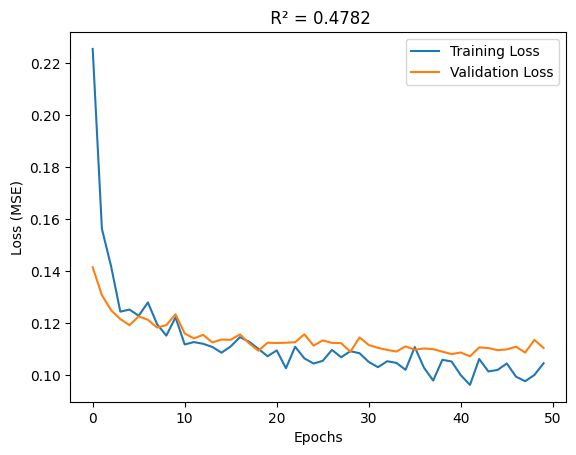

In [ ]:
# Build the ANN model with Dropout
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% rate after the first hidden layer

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))  # Dropout layer with 30% rate after the second hidden layer

model.add(Dense(1))  # Output layer for regression

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Visualize the architecture/shapes of the model
model.summary()

# Train the model
history = model.fit(
    x=X_train_scaled,
    y=y_train,
    epochs=50,
    batch_size=16, # test between 8, 16, 32, and 64
    validation_split=0.2
  )
plot_model_results(history, model, X_test_scaled, y_test)

# 6. Hyperparameter Tuning

## 6.1 Random Search
   - Description: Random search selects hyperparameter combinations randomly within specified ranges. Instead of evaluating every possible combination, it samples a fixed number of random combinations.
   - How It Works: The user specifies ranges or distributions for each hyperparameter, and the algorithm randomly selects values from these ranges for a set number of iterations.
   - Pros:
     - More efficient than grid search when the number of hyperparameters is large.
     - Can still find optimal or near-optimal configurations with less computational cost.
   - Cons:
     - Results depend on the number of samples; might miss the optimal combination if not enough samples are taken.
   - Use Case: Useful when the hyperparameter space is large or when prior knowledge of the best hyperparameter values is limited.



## 6.2 Early Stopping
- A technique to stop training when the model’s performance on the validation set stops improving, preventing overfitting.
- Impact: Saves computational resources and prevents the model from learning noise in the training data.

Reloading Tuner from tuner_results/small_framework_tuning/tuner0.json
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 2.4598 - mse: 0.8848 - val_loss: 1.4605 - val_mse: 0.2035
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6156 - mse: 0.4493 - val_loss: 1.1247 - val_mse: 0.1942
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1793 - mse: 0.3109 - val_loss: 0.8977 - val_mse: 0.1927
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9803 - mse: 0.3168 - val_loss: 0.7427 - val_mse: 0.1901
Epoch 5/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7509 - mse: 0.2199 - val_loss: 0.6121 - val_mse: 0.1506
Epoch 6/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5989 - mse: 0.1591 - val_loss: 0.5348 - val_mse: 0.1550
Epoch 7/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5282 - mse: 0.1652 - val_loss: 0.4739 - val_mse: 0.1575
Epoch 8/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4423 - mse: 0.1402 - val_loss: 0.4110 - val_mse: 0.1489
Epoch 9/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3821 - mse: 0.1314 - va

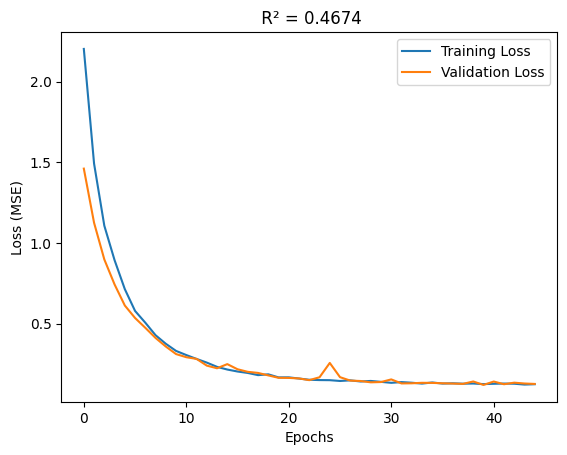

In [ ]:
# Define the model-building function for Keras Tuner
def build_model(hp):
    model = Sequential()

    # First Dense layer
    hp_units1 = hp.Int('units1', min_value=32, max_value=128, step=16)
    model.add(Dense(units=hp_units1, input_dim=X_train_scaled.shape[1],
                    activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    hp_dropout1 = hp.Float('dropout1', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout1))

    # Second Dense layer
    hp_units2 = hp.Int('units2', min_value=32, max_value=128, step=16)
    model.add(Dense(units=hp_units2, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    hp_dropout2 = hp.Float('dropout2', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout2))

    # Third Dense layer
    hp_units3 = hp.Int('units3', min_value=16, max_value=64, step=16)
    model.add(Dense(units=hp_units3, activation='relu', kernel_regularizer=l2(0.01)))
    model.add(BatchNormalization())
    hp_dropout3 = hp.Float('dropout3', min_value=0.1, max_value=0.5, step=0.1)
    model.add(Dropout(hp_dropout3))

    # Output layer for regression
    model.add(Dense(1))

    # Tune the learning rate for the Adam optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-3, 5e-4, 1e-4])
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate), loss='mse', metrics=['mae'])

    return model

# Initialize the Keras Tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,  # Number of hyperparameter combinations to try
    executions_per_trial=2,  # Number of times to train each model (for stability)
    directory='my_dir',
    project_name='ann_tuning'
)

# Early stopping callback to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Run the hyperparameter search
tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Print the best hyperparameters
print(f"""
The best number of units in the first hidden layer is: {best_hps.get('units1')}
The best dropout rate for the first hidden layer is: {best_hps.get('dropout1')}
The best number of units in the second hidden layer is: {best_hps.get('units2')}
The best dropout rate for the second hidden layer is: {best_hps.get('dropout2')}
The best number of units in the third hidden layer is: {best_hps.get('units3')}
The best dropout rate for the third hidden layer is: {best_hps.get('dropout3')}
The best learning rate is: {best_hps.get('learning_rate')}
""")

# Build the model with the best hyperparameters and train it
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[early_stop])

# Evaluate the best model on the test set
plot_model_results(history, best_model, X_test_scaled, y_test)
